In [1]:
import os, sys
import pickle

import seaborn as sns 
import matplotlib.pyplot as plt

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from get_forecasting_model import *

In [2]:
predictor = Predictor('de-rvfl', '5min', 12)

In [3]:
# df = pd.read_csv(os.path.join(project_root, 'data', 'processed', f"train.csv"))

df = pd.read_csv('D:/Study/Education/Projects/DataFlow/DataFlow_2026/data/processed/train.csv')

In [6]:
df.head(2)

,ip,identd,user,time,request,status,size,resource,protocol,utc,status_label
0,199.72.81.55,-,-,1995-07-01 00:00:01,GET /history/apollo/ HTTP/1.0,200,6245.0,/history/apollo/,HTTP/1.0,UTC - 04,Success
1,unicomp6.unicomp.net,-,-,1995-07-01 00:00:06,GET /shuttle/countdown/ HTTP/1.0,200,3985.0,/shuttle/countdown/,HTTP/1.0,UTC - 04,Success


In [4]:
X, y = predictor.process_input(df)

In [5]:
X.shape

(15252, 72)

In [6]:
with open('artifact/de-rvfl.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(X)

In [7]:
y_pred

array([15.69743307, 15.64045331, 15.71531889, ..., 14.55553388,
       14.38201614, 14.27016465], shape=(15252,))

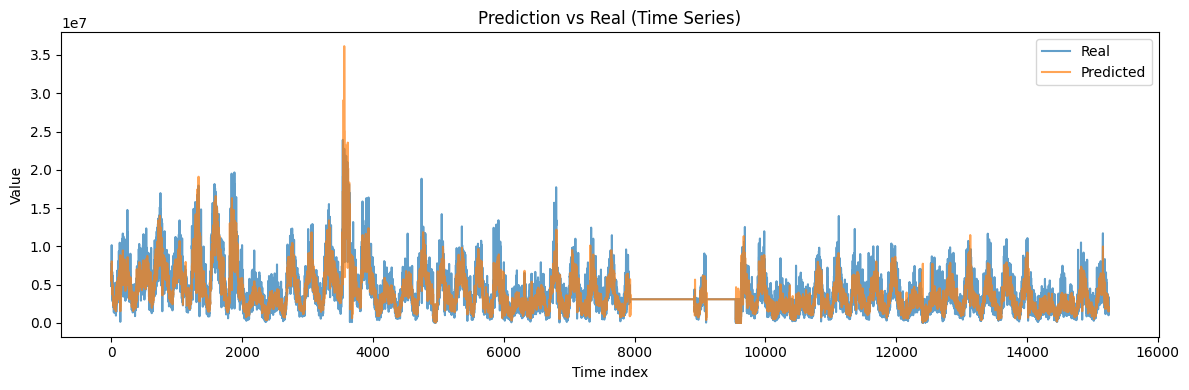

In [8]:
y_pred = np.exp(y_pred)
y_true = np.exp(y)

t = range(len(y))

plt.figure(figsize=(12, 4))
plt.plot(t, y_true, label="Real", alpha=0.7)
plt.plot(t, y_pred, label="Predicted", alpha=0.7)

plt.title("Prediction vs Real (Time Series)")
plt.xlabel("Time index")
plt.ylabel("Value")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()